In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn, pickle, json

In [2]:
print("numpy==",np.__version__)
print("pandas==",pd.__version__)
print("sklearn==",sklearn.__version__)
print("seaborn==",sns.__version__)
print("json==",json.__version__)

numpy== 1.26.4
pandas== 2.1.4
sklearn== 1.2.2
seaborn== 0.13.2
json== 2.0.9


In [3]:
car_df = pd.read_csv('quikr_car.csv')

In [4]:
car_df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [5]:
car_df.shape

(892, 6)

In [6]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


### Data Assessment

Numerical Data: 
- year
- Price
- kms_driven

Categorical Data:
- name
- company
- fuel_type

In [7]:
# Numerical Feature Analysis
car_df.year.unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [8]:
car_df.Price.unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [9]:
car_df.kms_driven.unique()

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

In [10]:
car_df.fuel_type.unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

#### Analysis Conclusion:
- Year: we have dtype as obj and we need to make it int, and remove the non-year values
- Price: we have dtype as obj -> int and 'Ask For Price'
- kms_driven: obj -> int and ' kms' remove it. Also two rows have 'Petrol' in them
- fuel_type: we need remove the nulls
- Name: we need to make 3 words long

### Data Cleaning:
Note: Keep a backup file

In [11]:
# storing backup
backup = car_df.copy()

In [12]:
# Year column 
# removed all the non year values
car_df =car_df[car_df.year.str.isnumeric() == True]

In [13]:
car_df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [14]:
car_df.year =car_df.year.astype(int)

In [15]:
car_df.year

0      2007
1      2006
2      2018
3      2014
4      2014
       ... 
886    2009
888    2018
889    2013
890    2014
891    2014
Name: year, Length: 842, dtype: int32

In [16]:
# Price Coulmn
car_df = car_df[car_df.Price != 'Ask For Price']

In [17]:
car_df.Price = car_df.Price.str.replace(',','').astype(int)

In [18]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int32 
 3   Price       819 non-null    int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.4+ KB


In [19]:
car_df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,"45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40 kms,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,"28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,"36,000 kms",Diesel
6,Ford Figo,Ford,2012,175000,"41,000 kms",Diesel


In [20]:
# kms_driven Column
car_df.kms_driven = car_df.kms_driven.str.replace(',','')

In [21]:
car_df.kms_driven = car_df.kms_driven.str.replace(' kms','')

In [22]:
car_df = car_df[car_df.kms_driven != 'Petrol']

In [23]:
car_df.kms_driven = car_df.kms_driven.astype(int)

In [24]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [25]:
# Categorical Data
car_df.fuel_type.value_counts()

fuel_type
Petrol    428
Diesel    386
LPG         2
Name: count, dtype: int64

In [26]:
car_df[car_df.fuel_type.isna() == True]

,name,company,year,Price,kms_driven,fuel_type
132,Toyota Corolla,Toyota,2009,275000,26000,NaN


In [27]:
car_df.fuel_type.fillna(inplace = True, value = 'Petrol')

In [28]:
car_df[car_df.fuel_type.isna() == True]

,name,company,year,Price,kms_driven,fuel_type


In [29]:
car_df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


In [30]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   817 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [31]:
# Name Column
car_df.name.str.split(' ')

0        [Hyundai, Santro, Xing, XO, eRLX, Euro, III]
1                        [Mahindra, Jeep, CL550, MDI]
3      [Hyundai, Grand, i10, Magna, 1.2, Kappa, VTVT]
4              [Ford, EcoSport, Titanium, 1.5L, TDCi]
6                                        [Ford, Figo]
                            ...                      
883                  [Maruti, Suzuki, Ritz, VXI, ABS]
885                  [Tata, Indica, V2, DLE, BS, III]
886                          [Toyota, Corolla, Altis]
888                          [Tata, Zest, XM, Diesel]
889                            [Mahindra, Quanto, C8]
Name: name, Length: 817, dtype: object

In [32]:
car_df.name.str.split(' ').str.slice(0,3)

0         [Hyundai, Santro, Xing]
1         [Mahindra, Jeep, CL550]
3           [Hyundai, Grand, i10]
4      [Ford, EcoSport, Titanium]
6                    [Ford, Figo]
                  ...            
883        [Maruti, Suzuki, Ritz]
885            [Tata, Indica, V2]
886      [Toyota, Corolla, Altis]
888              [Tata, Zest, XM]
889        [Mahindra, Quanto, C8]
Name: name, Length: 817, dtype: object

In [33]:
car_df.name = car_df.name.str.split(' ').str.slice(0,3).str.join(' ')

In [34]:
car_df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


In [35]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   817 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [36]:
car_df.describe()

,year,Price,kms_driven
count,817.000000,8.170000e+02,817.000000
mean,2012.440636,4.115503e+05,46250.714810
std,4.002354,4.749173e+05,34283.745254
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.900000e+05,56758.000000
max,2019.000000,8.500003e+06,400000.000000


In [37]:
car_df.describe(include = 'all')

,name,company,year,Price,kms_driven,fuel_type
count,817,817,817.000000,8.170000e+02,817.000000,817
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,429
mean,NaN,NaN,2012.440636,4.115503e+05,46250.714810,NaN
std,NaN,NaN,4.002354,4.749173e+05,34283.745254,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.900000e+05,56758.000000,NaN


In [38]:
car_df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [39]:
car_df.reset_index(drop=True, inplace=True)

In [40]:
car_df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


In [41]:
car_df[car_df.Price > 6000000]

,name,company,year,Price,kms_driven,fuel_type
535,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


In [42]:
car_df = car_df[car_df.Price < 6000000]

In [43]:
car_df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
812,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
813,Tata Indica V2,Tata,2009,110000,30000,Diesel
814,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
815,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [44]:
car_df.to_csv('Cleaned_Car_data.csv')

### Visual Analysis

- Relation between 'company' and 'Price'

C:\Users\igmsp\AppData\Local\Temp\ipykernel_28680\4208988403.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x = 'company', y = 'Price', data = car_df, palette = 'rainbow')
C:\Users\igmsp\AppData\Local\Temp\ipykernel_28680\4208988403.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)


[Text(0, 0, 'Hyundai'),
 Text(1, 0, 'Mahindra'),
 Text(2, 0, 'Ford'),
 Text(3, 0, 'Maruti'),
 Text(4, 0, 'Skoda'),
 Text(5, 0, 'Audi'),
 Text(6, 0, 'Toyota'),
 Text(7, 0, 'Renault'),
 Text(8, 0, 'Honda'),
 Text(9, 0, 'Datsun'),
 Text(10, 0, 'Mitsubishi'),
 Text(11, 0, 'Tata'),
 Text(12, 0, 'Volkswagen'),
 Text(13, 0, 'Chevrolet'),
 Text(14, 0, 'Mini'),
 Text(15, 0, 'BMW'),
 Text(16, 0, 'Nissan'),
 Text(17, 0, 'Hindustan'),
 Text(18, 0, 'Fiat'),
 Text(19, 0, 'Force'),
 Text(20, 0, 'Mercedes'),
 Text(21, 0, 'Land'),
 Text(22, 0, 'Jaguar'),
 Text(23, 0, 'Jeep'),
 Text(24, 0, 'Volvo')]

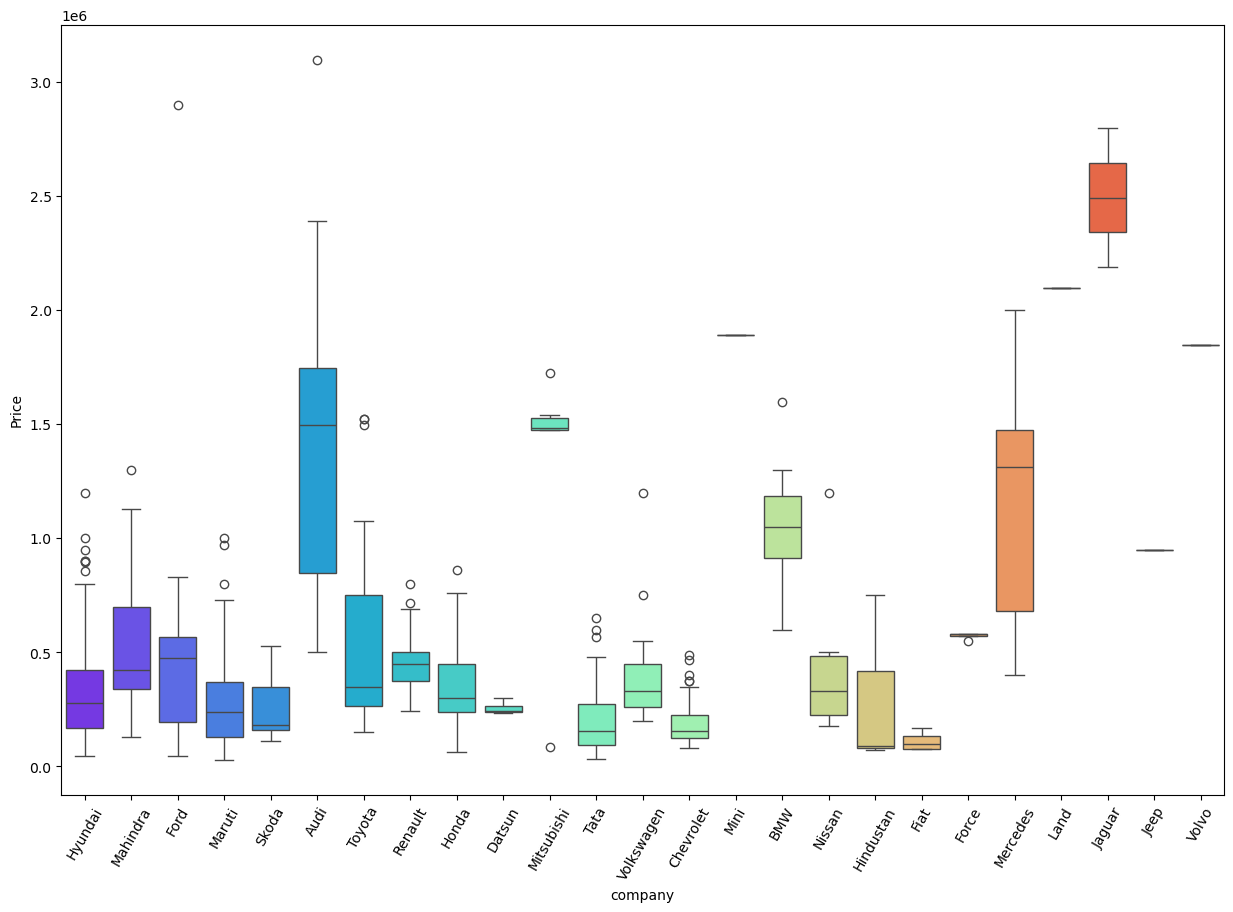

In [45]:
plt.subplots(figsize =(15, 10))
ax = sns.boxplot(x = 'company', y = 'Price', data = car_df, palette = 'rainbow')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)


- Relation between 'year' and 'Price'

C:\Users\igmsp\AppData\Local\Temp\ipykernel_28680\3262083169.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x = 'year', y = 'Price', data = car_df, palette = 'rainbow')
C:\Users\igmsp\AppData\Local\Temp\ipykernel_28680\3262083169.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)


[Text(1990.0, 0, '1990'),
 Text(1995.0, 0, '1995'),
 Text(2000.0, 0, '2000'),
 Text(2005.0, 0, '2005'),
 Text(2010.0, 0, '2010'),
 Text(2015.0, 0, '2015'),
 Text(2020.0, 0, '2020'),
 Text(2025.0, 0, '2025')]

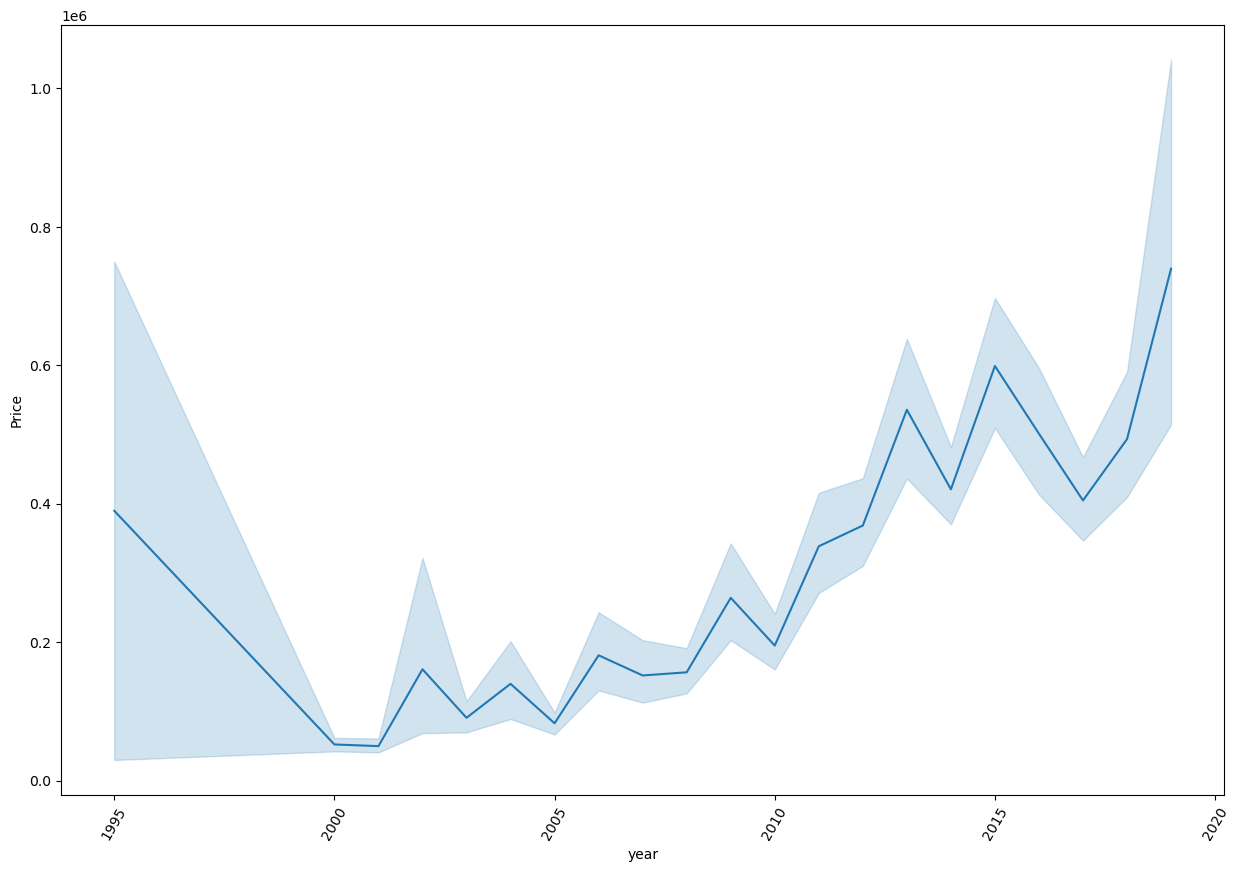

In [46]:
plt.subplots(figsize =(15, 10))
ax = sns.lineplot(x = 'year', y = 'Price', data = car_df, palette = 'rainbow')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)

- Relation between kms_driven and fuel_type

C:\Users\igmsp\AppData\Local\Temp\ipykernel_28680\4283642034.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.relplot(x = 'kms_driven', y = 'Price', data = car_df, palette = 'rainbow')


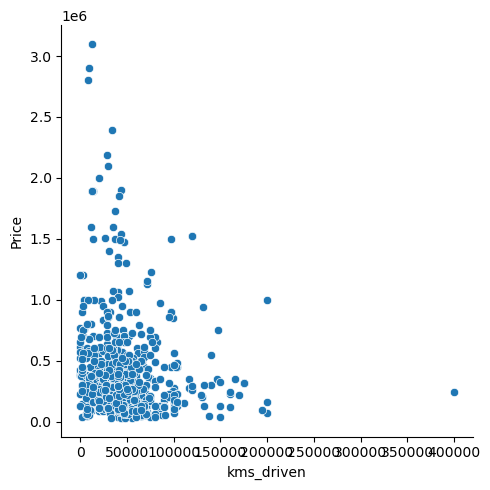

In [47]:
ax = sns.relplot(x = 'kms_driven', y = 'Price', data = car_df, palette = 'rainbow')

Car driven more, price less

- Relation b/w fuel_type and price

C:\Users\igmsp\AppData\Local\Temp\ipykernel_28680\2745088883.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.swarmplot(x = 'fuel_type', y = 'Price', data = car_df, palette = 'rainbow')
C:\Users\igmsp\AppData\Local\Temp\ipykernel_28680\2745088883.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)


[Text(0, 0, 'Petrol'), Text(1, 0, 'Diesel'), Text(2, 0, 'LPG')]

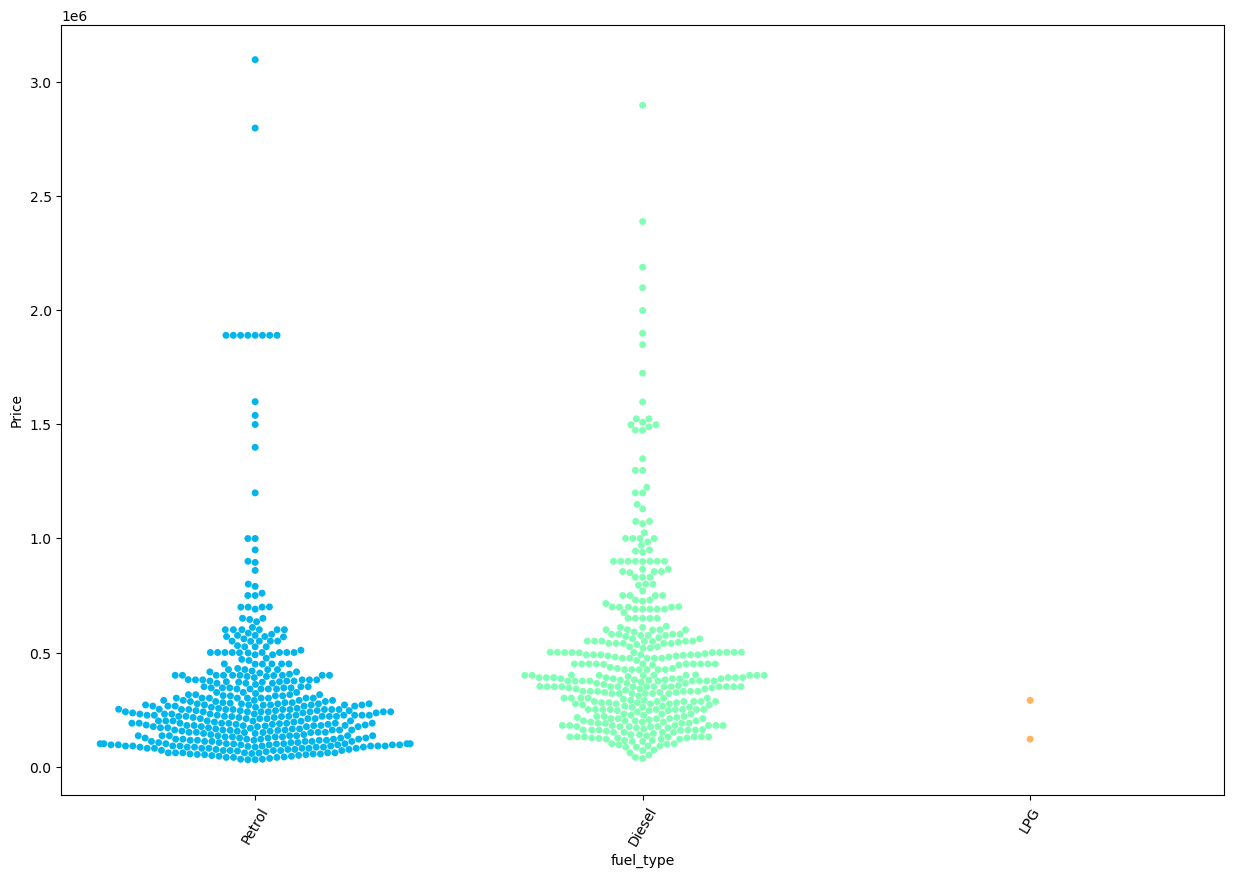

In [48]:
plt.subplots(figsize =(15, 10))
ax = sns.swarmplot(x = 'fuel_type', y = 'Price', data = car_df, palette = 'rainbow')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)

In general, petrol cars are cheaper than diesel

- Relation b/w company, fuel_type and price

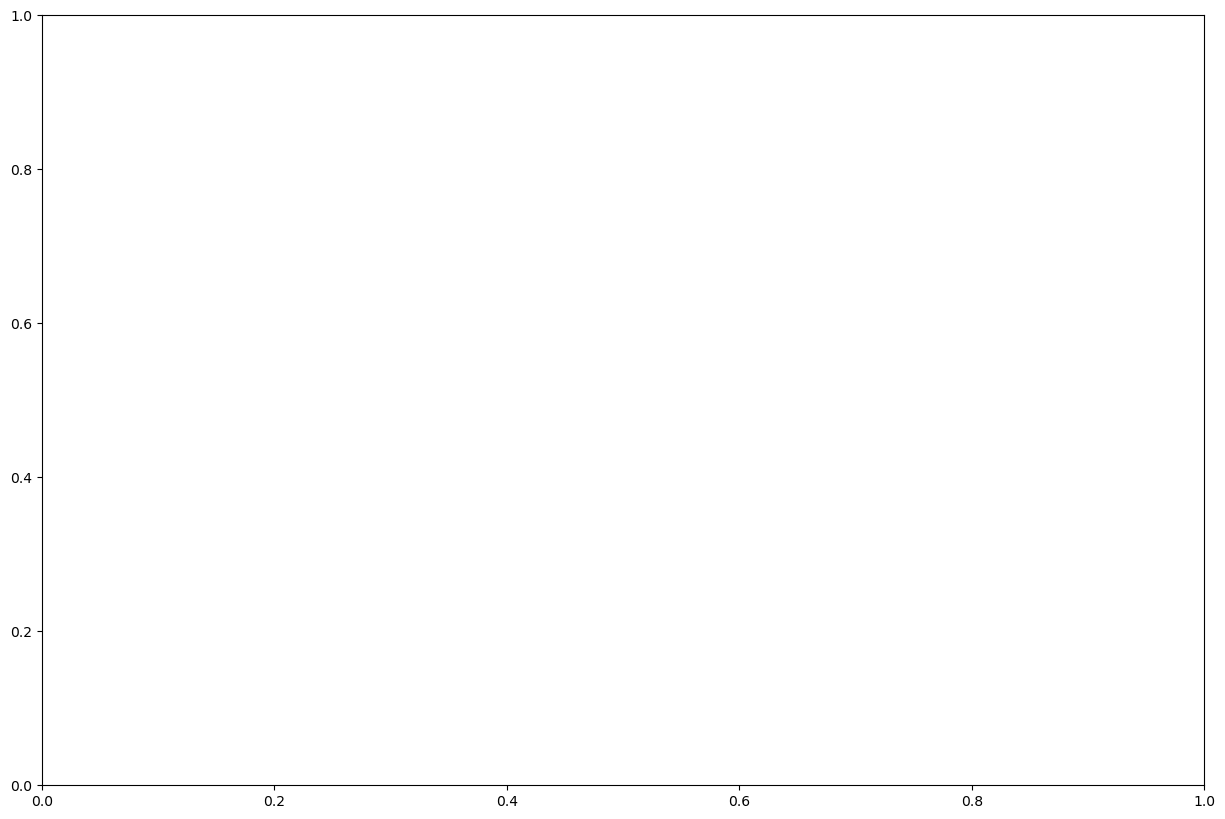

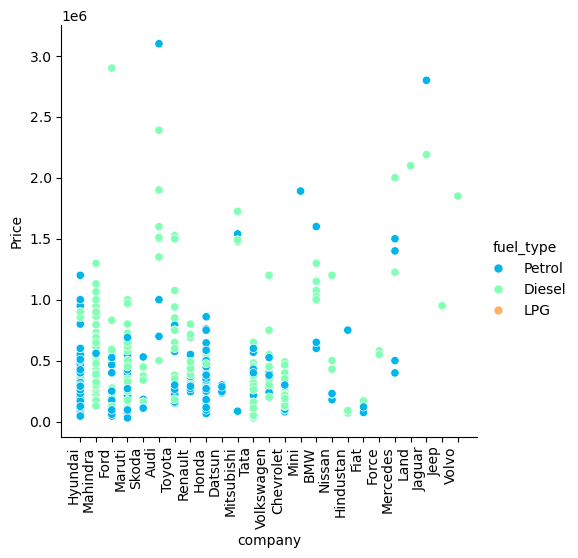

In [49]:
plt.subplots(figsize =(15, 10))
ax = sns.relplot(x = 'company', y = 'Price', data = car_df, palette = 'rainbow', hue='fuel_type')
ax.set_xticklabels(rotation = 90, ha = 'right')
plt.show()

### Model Training

Step 1: Transformed to fit into the model

In [50]:
X = car_df[['company', 'name', 'year', 'kms_driven', 'fuel_type']]
y = car_df['Price']
X.shape, y.shape

((816, 5), (816,))

In [51]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

ohe = OneHotEncoder()
ohe.fit(X[['name', 'company', 'fuel_type']])

# Example preprocessing during training
column_transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['name', 'company', 'fuel_type']),  # Categorical columns
    remainder='passthrough'  # Leave numerical columns unchanged
)


In [52]:
transformed_X = column_transformer.fit_transform(X)
all_feature_names = column_transformer.get_feature_names_out()
transformed_X

<816x284 sparse matrix of type '<class 'numpy.float64'>'
	with 4073 stored elements in Compressed Sparse Row format>

In [53]:
print("Shape of transformed_X:", transformed_X.shape)
print("Number of feature names:", len(all_feature_names))

Shape of transformed_X: (816, 284)
Number of feature names: 284


Step 2: Extracting Training Data

In [54]:
# training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20)

In [55]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((796, 5), (20, 5), (796,), (20,))

In the above output you can notice that the 5 features we have in X are transformed into 284 features using OneHotEncoder. This is what happens on encoding.

Data before encoding:

|name       | company   | fuel_type  | year  | kms_driven |
| ------- | ----    | ----     | ----  | ---- |
| Maruti 800  | Maruti     | Petrol      | 2010   | 50000 |
| Honda City  | Honda      | Diesel      | 2015   | 30000 |

Data after encoding:

| name_Maruti 800  | name_Honda City  | company_Maruti  | company_Honda  | fuel_type_Petrol  | fuel_type_Diesel  | year  | kms_driven |
| ------- | ----    | ----     | ----  | ---- | ---- | ----  | ---- |
| 1.0            | 0.0             | 1.0             | 0.0            | 1.0               | 0.0              | 2010   | 50000 |
| 0.0             | 1.0              | 0.0             | 1.0            | 0.0               | 1.0              | 2015   | 30000 |


Step 3: Import model

In [56]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

Step 4: make the pipeline

In [57]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(column_transformer, LR)

Step 5: Fitting the model

In [58]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [59]:
y_pred = pipe.predict(X_test)

In [60]:
y_pred

array([191609.8061996 , 199367.18180308, 378150.46665623, 147367.0355862 ,
       290648.11727931,  76379.09365451, 427379.18487784, 400009.46185191,
       263105.32932705, 365776.73446754,  55723.60954173,  -2089.6752072 ,
       504559.83772025, 340804.91176307, 102931.42809392,  47874.67040098,
       521446.34705542, 603341.03455717, 424652.10667495, 312961.61311505])

Step 6: Checking R2 score

In [61]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.586077025956079

Step 7: Find the model with a certain to give the best r2_score

In [62]:
scores = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=i)
    LR = LinearRegression()
    pipe = make_pipeline(column_transformer, LR)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    scores.append(r2_score(y_test, y_pred))

In [63]:
np.argmax(scores)

807

In [64]:
scores[807]

0.9594905724099275

Step 8: Save the model

In [65]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [66]:
input_data = pd.DataFrame(columns=['company', 'name', 'year', 'kms_driven', 'fuel_type'], data=[['Maruti','Maruti Suzuki Swift', 2020, 10, 'Diesel']])
pipe.predict(input_data)

array([547653.07795291])

In [67]:
# Loading the model and testing on a sample input
with open('LinearRegressionModel.pkl', 'rb') as f:
    model = pickle.load(f)

# Example user input
user_input = pd.DataFrame([['Honda Amaze', 'Honda', 2015, 50000, 'Petrol']],
                          columns=['name', 'company', 'year', 'kms_driven', 'fuel_type'])

# Predict the price
predicted_price = model.predict(user_input)
print("Predicted Price:", predicted_price[0])

Predicted Price: 288994.81198691577
